In [32]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tslearn.clustering import silhouette_score
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import itertools

In [33]:
with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)

with open('./pickles/newResa4.pickle', 'rb') as handle:
    newResa4 = pickle.load(handle)

with open('./pickles/newResa6.pickle', 'rb') as handle:
    newResa6 = pickle.load(handle)

with open('./pickles/kmeans_total_3_c4.pickle', 'rb') as handle:
    kmeans_total3 = pickle.load(handle)

with open('./pickles/kmeans_total_3_c4.pickle', 'rb') as handle:
    kmeans_total3_master = pickle.load(handle)

with open('./pickles/kmeans_total_4_c6.pickle', 'rb') as handle:
    kmeans_total4 = pickle.load(handle)

with open('./pickles/kmeans_total_4_c6.pickle', 'rb') as handle:
    kmeans_total4_master = pickle.load(handle)

with open('./pickles/kmeans_total_6_c2.pickle', 'rb') as handle:
    kmeans_total6 = pickle.load(handle)

with open('./pickles/kmeans_total_6_c2.pickle', 'rb') as handle:
    kmeans_total6_master = pickle.load(handle)

In [34]:
newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]
newResa4 = newResa4[(newResa4<=11000) & (newResa4 >= 4000)]
newResa6 = newResa6[(newResa6<=11000) & (newResa6 >= 4000)]

In [35]:
def split_resa(k,resa):
    percentile_value = 1/k
    label = np.ndarray([resa.shape[0]],dtype=int)
    label[:] = int(-1)

    for i in range(0,k):
        label[(resa <= np.quantile(resa,q=(percentile_value*(i+1)))) & (resa >= np.quantile(resa,q=(percentile_value*i)))] = i

    return label


In [36]:
def removeTexts(xlim=np.Inf,ylim=np.Inf):
    axis = plt.gca()
    for text in axis.texts:
        if text.get_position()[0] > xlim or text.get_position()[0] > ylim: #check if x is more than 3
            text.remove()


TypeError: '>' not supported between instances of 'int' and 'NoneType'

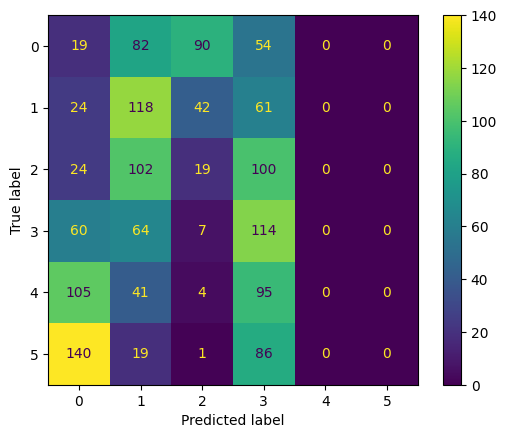

In [37]:
ConfusionMatrixDisplay.from_predictions(split_resa(6,newResa3),kmeans_total3[6,0])

removeTexts(xlim=3)
plt.xlabel('Cluster')
plt.ylabel('classi resa')
plt.xlim([-0.5,3.5])
plt.show()

[array([Text(0, 0, '19'), Text(1, 0, '82'), Text(2, 0, '90'),
       Text(3, 0, '54')], dtype=object), array([Text(0, 1, '24'), Text(1, 1, '118'), Text(2, 1, '42'),
       Text(3, 1, '61')], dtype=object), array([Text(0, 2, '24'), Text(1, 2, '102'), Text(2, 2, '19'),
       Text(3, 2, '100')], dtype=object), array([Text(0, 3, '60'), Text(1, 3, '64'), Text(2, 3, '7'),
       Text(3, 3, '114')], dtype=object), array([Text(0, 4, '105'), Text(1, 4, '41'), Text(2, 4, '4'),
       Text(3, 4, '95')], dtype=object), array([Text(0, 5, '140'), Text(1, 5, '19'), Text(2, 5, '1'),
       Text(3, 5, '86')], dtype=object)]


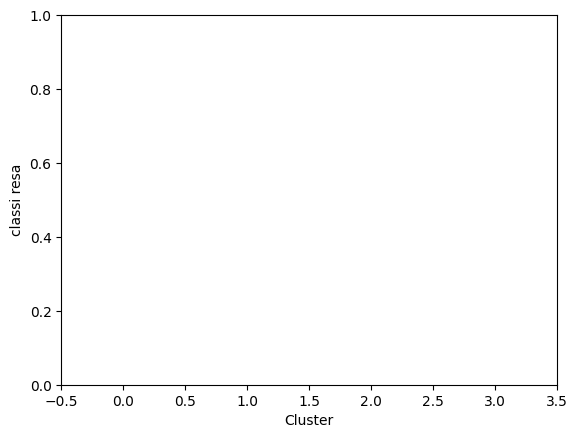

In [ ]:
new_text = []

for a in confusion.text_:
    new_text.append(a[:-2])
print(new_text)
confusion.text_ = new_text
plt.xlabel('Cluster')
plt.ylabel('classi resa')
plt.xlim(-0.5,3.5)
plt.show(confusion)